In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
# df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron..."
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',..."
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ..."
8,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne..."
9,public-apis/public-apis,"['api', 'list', 'development', 'public', 'reso..."


In [3]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [4]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list


df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str



['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'api list development public resources free software api api',
 'javascript css html sass bootstrap scss css',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures prototypes material',
 'python design development programming web system design interview web web interview interview system',

In [5]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 1000, feature 216)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53670439, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
tfidf_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zookeeper,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996icu/996.ICU,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EbookFoundation/free-programming-books,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jwasham/coding-interview-university,0.000000,0.34822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vuejs/vue,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.512163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dianping/cat,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oracle/graal,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=155)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.200725,0.038625,0.085080,0.095191,0.047665,-0.037715,0.029499,-0.100122,0.070946,-0.062199,...,-0.006116,0.015123,-0.021878,-0.002211,0.009112,0.008106,0.003024,-0.025170,-0.020055,-0.015529
996icu/996.ICU,-0.045399,-0.038910,-0.030444,-0.032809,0.009810,-0.009769,-0.020761,0.008933,0.000525,-0.038147,...,-0.002076,-0.002787,-0.000897,-0.002600,-0.002014,-0.000356,-0.003945,-0.000779,-0.001350,-0.002262
EbookFoundation/free-programming-books,-0.030770,-0.042380,-0.116729,0.278091,0.174115,-0.045300,0.171026,0.067311,-0.134642,0.051681,...,0.001192,-0.034824,0.000138,0.030918,0.054298,0.035386,-0.017070,0.071723,0.058896,-0.007531
jwasham/coding-interview-university,-0.052740,0.050063,0.086142,-0.083001,0.048671,0.099304,0.199585,0.142745,0.462761,0.124431,...,-0.005752,-0.004113,-0.016447,-0.034502,-0.001004,-0.012716,0.000256,0.008790,0.027665,0.018612
vuejs/vue,0.330766,0.063389,0.007521,-0.104730,-0.078008,0.020198,-0.022332,0.093897,-0.058047,0.012558,...,0.015445,0.007317,0.009652,-0.015824,0.006900,-0.017106,0.002785,-0.000829,-0.006667,-0.036412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mpv-player/mpv,-0.047813,-0.062044,-0.041551,-0.076252,-0.044486,0.007174,-0.035108,-0.035435,-0.071695,-0.028306,...,0.022430,0.059419,0.019174,0.013460,-0.002548,-0.000575,-0.024774,0.021295,-0.006724,0.040214
dianping/cat,-0.088468,-0.041522,-0.043072,-0.006212,-0.122822,-0.079376,0.116330,-0.015674,0.096672,0.038007,...,0.007589,0.076382,-0.017348,0.014393,-0.016391,-0.000341,0.015545,-0.050812,-0.062344,-0.016647
oracle/graal,0.085178,0.337795,-0.011673,0.064508,-0.265788,0.193669,0.269474,0.016053,0.071328,-0.006850,...,-0.003447,0.015263,0.025757,-0.014540,0.011945,-0.008837,0.000156,0.014944,-0.000764,0.009865


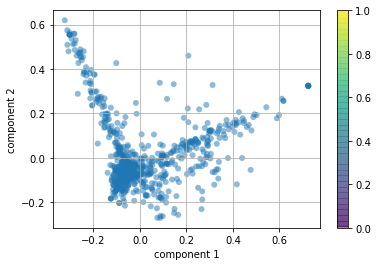

In [8]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [9]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)




0.9506879832227288
155


In [10]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.025167,0.034202,0.034202
pca2,0.019263,0.026178,0.060381
pca3,0.016489,0.022409,0.082789
pca4,0.015737,0.021386,0.104175
pca5,0.014790,0.020099,0.124274
...,...,...,...
pca151,0.001200,0.001630,0.944497
pca152,0.001161,0.001577,0.946074
pca153,0.001154,0.001568,0.947642
pca154,0.001122,0.001524,0.949166


In [11]:
dbscan = DBSCAN(eps = 0.45, min_samples=5, metric='cosine')
# dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([-1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  9,  1,
        1,  1,  1,  0, -1,  1, -1,  0,  1,  0, -1,  0,  2,  1,  1, -1, -1,
        1,  1, -1, -1,  1,  3,  1,  7,  1,  1,  1,  1,  1,  1,  1,  0,  1,
        1,  1, -1,  1,  1,  4,  1, -1,  1,  1,  0,  3,  0, -1,  0, -1,  1,
        1,  1,  1,  0,  0,  1,  5,  2,  1,  2,  1,  1, -1,  0,  1,  1, -1,
       -1, -1,  1,  1,  0,  0,  1, -1,  1,  0,  1,  1,  5,  1,  1,  1,  1,
       -1,  0, -1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,  1,  1,  0,
        0,  1, -1,  1, -1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  5,  1,  1,  1,  0,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,
        1,  0,  1,  1,  5,  1,  1,  1,  6, -1,  1,  0,  1,  1, -1,  1,  0,
        0,  1,  1,  1,  6,  1,  1,  1,  1,  0,  0,  1,  7,  1,  1,  0,  1,
        8, -1,  0,  0,  6,  1,  3,  1,  5,  0,  1,  1,  1, -1, -1, -1,  1,
        0,  1,  1,  1,  1

In [12]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic



# 클러스터링이 된 패키지들
# 20개의 군집으로 생성
dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic


df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num



topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('javascript', 38),
  ('web', 31),
  ('react', 28),
  ('hacktoberfest', 22),
  ('data', 18),
  ('nodejs', 17),
  ('linux', 17),
  ('python', 16),
  ('workflow', 16),
  ('server', 14),
  ('java', 12),
  ('macos', 12),
  ('document', 12),
  ('free', 11),
  ('system', 11)],
 [('flutter', 3),
  ('dotnet', 2),
  ('dotnet-core', 2),
  ('slideshow', 1),
  ('slides', 1),
  ('presentations', 1),
  ('koa', 1),
  ('knowledge', 1),
  ('hangzhou', 1),
  ('dart', 1),
  ('deprecated', 1),
  ('not-maintained', 1),
  ('waifu2x', 1),
  ('torch', 1),
  ('super-resolution', 1)],
 [('javascript', 142),
  ('python', 84),
  ('web', 82),
  ('react', 80),
  ('interview', 62),
  ('awesome', 62),
  ('vue', 56),
  ('nodejs', 53),
  ('machinelearning', 52),
  ('hacktoberfest', 51),
  ('sql', 49),
  ('css', 48),
  ('data', 46),
  ('deep-learning', 44),
  ('test', 42)],
 [('c-plus-plus', 8),
  ('cpp', 4),
  ('crypto', 2),
  ('c', 2),
  ('awesome', 2),
  ('electron', 1),
  ('nodejs', 1),
  ('javascript', 1),
  ('cs

In [13]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[freeCodeCamp/freeCodeCamp, EbookFoundation/fr...",159,"[(javascript, 38), (web, 31), (react, 28), (ha..."
1,0,"[996icu/996.ICU, torvalds/linux, jackfrued/Pyt...",247,"[(flutter, 3), (dotnet, 2), (dotnet-core, 2), ..."
2,1,"[jwasham/coding-interview-university, vuejs/vu...",512,"[(javascript, 142), (python, 84), (web, 82), (..."
3,2,"[electron/electron, bitcoin/bitcoin, opencv/op...",8,"[(c-plus-plus, 8), (cpp, 4), (crypto, 2), (c, ..."
4,3,"[kubernetes/kubernetes, moby/moby, iamkun/dayj...",17,"[(docker, 29), (kubernetes, 6), (containers, 5..."
5,4,"[laravel/laravel, symfony/symfony, ziadoz/awes...",9,"[(php, 22), (framework, 3), (laravel, 2), (hac..."
6,5,"[spring-projects/spring-boot, macrozheng/mall,...",20,"[(spring, 54), (admin, 14), (microservice, 7),..."
7,6,"[iptv-org/iptv, vsouza/awesome-ios, Alamofire/...",15,"[(swift, 32), (json, 18), (ios, 12), (react, 6..."
8,7,"[microsoft/terminal, x64dbg/x64dbg, microsoft/...",5,"[(windows, 8), (x64, 3), (cpp, 2), (console, 1..."
9,8,"[vercel/hyper, mbadolato/iTerm2-Color-Schemes,...",4,"[(terminal, 12), (react, 2), (electron, 2), (t..."


In [14]:
# 다중 클러스터링을 해야할 패키지들
target_topics = df_dbscan_cluster.sort_values(by=['cluster_num'],ascending=False).iloc[0]['clusters']
target_topics

['jwasham/coding-interview-university',
 'vuejs/vue',
 'facebook/react',
 'kamranahmedse/developer-roadmap',
 'sindresorhus/awesome',
 'tensorflow/tensorflow',
 'public-apis/public-apis',
 'twbs/bootstrap',
 'donnemartin/system-design-primer',
 'CyC2018/CS-Notes',
 'ohmyzsh/ohmyzsh',
 'github/gitignore',
 'microsoft/vscode',
 'trekhleb/javascript-algorithms',
 'TheAlgorithms/Python',
 'airbnb/javascript',
 'vinta/awesome-python',
 'labuladong/fucking-algorithm',
 'ossu/computer-science',
 'golang/go',
 'axios/axios',
 'nodejs/node',
 'denoland/deno',
 'angular/angular',
 'ant-design/ant-design',
 'mrdoob/three.js',
 'microsoft/TypeScript',
 'puppeteer/puppeteer',
 'vercel/next.js',
 'animate-css/animate.css',
 'mui-org/material-ui',
 'goldbergyoni/nodebestpractices',
 'PanJiaChen/vue-element-admin',
 'avelino/awesome-go',
 'MisterBooo/LeetCodeAnimation',
 'FortAwesome/Font-Awesome',
 'nvbn/thefuck',
 'awesome-selfhosted/awesome-selfhosted',
 'webpack/webpack',
 'rust-lang/rust',
 'tons

In [15]:
# 다중클러스터링대상인 프로젝트들의 벡터들
df_clus_2 =  df[df['project_name'].isin(target_topics)]
df_clus_2


,project_name,topic_keyword,topic_keyword_str
3,jwasham/coding-interview-university,"[computer-science, algorithm, algorithms, inte...",computer-science algorithm algorithm interview...
4,vuejs/vue,"[javascript, framework, vue, frontend]",javascript framework vue frontend
5,facebook/react,"[react, javascript, library, ui, frontend, dec...",react javascript library ui frontend declarative
6,kamranahmedse/developer-roadmap,"[computer-science, engineering, roadmap, study...",computer-science engineering roadmap study-pla...
7,sindresorhus/awesome,"[lists, awesome, unicorns, resources, awesome-...",lists awesome unicorns resources awesome
...,...,...,...
994,dropzone/dropzone,"[javascript, drag-and-drop, file-upload, javas...",javascript drag file javascript dropzone
995,mpv-player/mpv,"[audio, c, video, ffmpeg, multimedia, mpv, lib...",audio c vedio ffmpeg multi-platform mpv libav ...
997,oracle/graal,"[javascript, ruby, python, c, java, vm, r, pol...",javascript ruby python c java vm r polyglot
998,preservim/nerdtree,"[vim, vim-plugin, vim-plugins, file-management...",vim vim vim file file


In [16]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df_clus_2['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 512, feature 120)


array([[0.3536074, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [17]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df_clus_2['project_name'])
tfidf_vector_df

,algorithm,analytics,android,angular,animation,api,app,architecture,automation,awesome,...,typescript,ui,vedio,vim,vision,vue,web,wechat,windows,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
jwasham/coding-interview-university,0.353607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
vuejs/vue,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.506365,0.000000,0.0,0.0,0.0
facebook/react,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.449546,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
kamranahmedse/developer-roadmap,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
sindresorhus/awesome,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.817314,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dropzone/dropzone,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
mpv-player/mpv,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.48921,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
oracle/graal,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [18]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 155임
pca = PCA(n_components=91)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91
project_name,,,,,,,,,,,,,,,,,,,,,
jwasham/coding-interview-university,-0.085926,-0.048401,-0.107915,0.001284,0.166124,0.144358,0.115268,0.071853,0.448373,0.427584,...,-0.005775,0.026751,0.020898,0.016434,0.006105,-0.014058,0.022989,0.002749,0.007200,0.010722
vuejs/vue,0.274108,0.045740,-0.151810,-0.040409,0.039470,0.039460,-0.038927,-0.132421,-0.072994,0.288375,...,-0.068266,0.005529,0.065438,-0.013162,0.024418,0.012685,0.020816,-0.008095,-0.030652,-0.000266
facebook/react,0.254405,-0.086719,-0.224754,0.236491,0.121306,-0.081869,-0.011917,0.003226,-0.011968,-0.055829,...,-0.028593,-0.060251,-0.062247,-0.007072,0.162299,-0.091121,-0.049511,-0.011474,0.052612,-0.054317
kamranahmedse/developer-roadmap,-0.042354,-0.075060,-0.045271,-0.025168,-0.037997,0.122891,0.058026,0.049213,0.078141,0.135554,...,-0.026116,-0.017777,0.052158,-0.021012,-0.056241,0.093921,-0.012486,0.064309,-0.046827,0.066185
sindresorhus/awesome,-0.115204,-0.223434,-0.046197,0.101593,-0.149566,0.427358,0.092054,0.485283,-0.172188,0.075350,...,-0.046585,-0.195797,-0.053548,-0.080290,-0.073457,0.111265,0.042554,0.068153,0.031355,0.053640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dropzone/dropzone,0.336697,0.157248,-0.056627,-0.058997,0.029016,-0.026650,0.026496,0.109720,0.081884,-0.051070,...,-0.019194,0.032526,0.065134,-0.021872,0.100376,-0.106052,-0.058291,0.032519,-0.041301,0.032040
mpv-player/mpv,-0.038125,-0.076549,0.007688,-0.088313,-0.039313,0.010269,-0.038984,-0.034253,-0.065101,0.002570,...,-0.039715,-0.042804,-0.068307,0.194853,-0.032959,0.041998,0.012185,0.026910,-0.040905,-0.001191
oracle/graal,-0.017768,0.235463,0.027073,-0.153286,0.390436,0.010040,-0.001645,0.090596,0.166056,-0.169649,...,0.000391,-0.017345,-0.020604,0.008618,-0.032135,-0.005481,-0.008129,0.008545,-0.002319,-0.013052


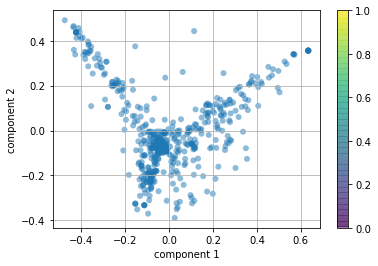

In [19]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [20]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
print(pca.explained_variance_ratio_.sum())

# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
print(pca_temp.n_components_)



0.9646010149352919
85


In [21]:
dbscan = DBSCAN(eps = 0.3, min_samples=5)
# dbscan = DBSCAN(eps = 0.1)
dbscan_cluster = dbscan.fit_predict(df_pca)
# dbscan_cluster

# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic



df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num


topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('javascript', 101),
  ('web', 68),
  ('python', 59),
  ('react', 57),
  ('awesome', 55),
  ('interview', 48),
  ('hacktoberfest', 46),
  ('nodejs', 37),
  ('vue', 37),
  ('css', 35),
  ('spring', 35),
  ('html', 31),
  ('android', 30),
  ('test', 29),
  ('data', 27)],
 [('git', 2),
  ('javascript', 1),
  ('fake', 1),
  ('faker', 1),
  ('mocking', 1),
  ('fake-content', 1),
  ('mocks', 1),
  ('fake-data', 1),
  ('faker-generator', 1),
  ('computer-science', 1),
  ('engineering', 1),
  ('architecture', 1),
  ('design', 1),
  ('principles', 1),
  ('software', 1)],
 [('javascript', 3),
  ('frontend', 3),
  ('terminal', 2),
  ('css', 2),
  ('html', 2),
  ('web', 2),
  ('interview', 2),
  ('php', 1),
  ('laravel', 1),
  ('framework', 1),
  ('notifications', 1),
  ('docker', 1),
  ('kubernetes', 1),
  ('iot', 1),
  ('devops', 1)],
 [('search', 2),
  ('java', 1),
  ('javascript', 1),
  ('ruby', 1),
  ('rails', 1),
  ('ember', 1),
  ('sql', 1),
  ('forum', 1),
  ('discourse', 1),
  ('css', 1

In [22]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[freeCodeCamp/freeCodeCamp, 996icu/996.ICU, Eb...",479,"[(javascript, 101), (web, 68), (python, 59), (..."
1,0,"[github/gitignore, Marak/faker.js, kamranahmed...",7,"[(git, 2), (javascript, 1), (fake, 1), (faker,..."
2,1,"[laravel/laravel, netdata/netdata, alacritty/a...",8,"[(javascript, 3), (frontend, 3), (terminal, 2)..."
3,2,"[apple/swift, elastic/elasticsearch, discourse...",5,"[(search, 2), (java, 1), (javascript, 1), (rub..."
4,3,"[huggingface/transformers, leonardomso/33-js-c...",5,"[(font, 6), (nlp, 5), (javascript, 4), (langua..."
5,4,"[scrapy/scrapy, aymericdamien/TensorFlow-Examp...",8,"[(hacktoberfest, 3), (vision, 3), (cloud, 3), ..."
